<a href="https://colab.research.google.com/github/ansehoon1999/MG-DataAnaylsis/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98_%EC%9D%B4%ED%9B%84%EB%A7%8C_%EC%8B%9C%EA%B3%84%EC%97%B4_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
older_ym2_sc = pd.read_csv('/content/gdrive/MyDrive/older_ym2_sc.csv', encoding='UTF-8')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt
import tslearn
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import matplotlib
matplotlib.font_manager._rebuild

<function matplotlib.font_manager._rebuild>

In [ ]:
older_ym2_sc = older_ym2_sc.drop('Unnamed: 0',axis=1)

KeyError: ignored

In [ ]:
timeSeries= older_ym2_sc.pivot_table(index='gb2',
                        columns='ta_ym', 
                        values='usec_sc')

In [ ]:
# timeSeries = timeSeries.reset_index(drop=True)

In [ ]:
timeSeries.columns = timeSeries.columns.astype('str')

In [ ]:
timeSeries = timeSeries.iloc[:,14:]

In [ ]:
import math
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def plot_timeSeries(timeSeries):
    with plt.style.context('seaborn'):      # 'fivethirtyeight'      
         fig = plt.figure(figsize=(20,8)) ;       
         ax1 = fig.add_subplot(111);
         plt.title('Longitudinal data',fontsize=25, fontweight='bold')
         plt.xlabel('Time', fontsize=15, fontweight='bold')
         plt.ylabel('Signal of the observed feature', fontsize=15, fontweight='bold')
         plt.plot(timeSeries.T)
         #ax1 = sns.tsplot(ax=ax1, data=timeSeries.values, ci=[68, 95])

def plot_dendogram(Z):
    with plt.style.context('fivethirtyeight' ): 
         plt.figure(figsize=(15, 5))
         plt.title('Dendrogram of time series clustering',fontsize=25, fontweight='bold')
         plt.xlabel('sample index', fontsize=25, fontweight='bold')
         plt.ylabel('distance', fontsize=25, fontweight='bold')
         hac.dendrogram( Z, leaf_rotation=90.,leaf_font_size=15., )
         plt.show()

def plot_results(timeSeries, D, cut_off_level):
    result = pd.Series(hac.fcluster(D, cut_off_level, criterion='maxclust'))
    clusters = result.unique()       
    figX = 20; figY = 15
    fig = plt.subplots(figsize=(figX, figY))   
    mimg = math.ceil(cut_off_level/2.0)
    gs = gridspec.GridSpec(mimg,2, width_ratios=[1,1])   
    for ipic, c in enumerate(clusters):
        cluster_index = result[result==c].index
        print(ipic, "Cluster number %d has %d elements" % (c, len(cluster_index)))
        ax1 = plt.subplot(gs[ipic])
        ax1.plot(timeSeries.T.iloc[:,cluster_index])
        ax1.set_title(('Cluster number '+str(c)), fontsize=15, fontweight='bold')      
    plt.show()


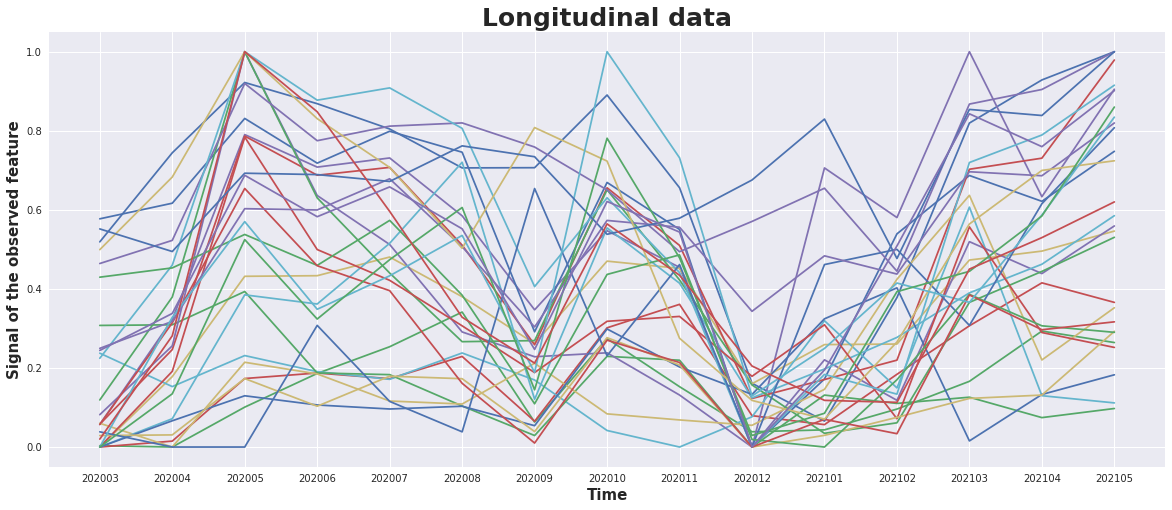

In [ ]:
plot_timeSeries(timeSeries)

In [ ]:
import scipy.stats

In [ ]:
result = pd.Series(hac.fcluster(D, cut_off_level, criterion='maxclust'))
clusters = result.unique()       

# cluster_index = result[result==1].index
#         print(ipic, "Cluster number %d has %d elements" % (c, len(cluster_index)))
#         ax1 = plt.subplot(gs[ipic])
#         ax1.plot(timeSeries.iloc[:,cluster_index])
#         ax1.set_title(('Cluster number '+str(c)), fontsize=15, fontweight='bold'

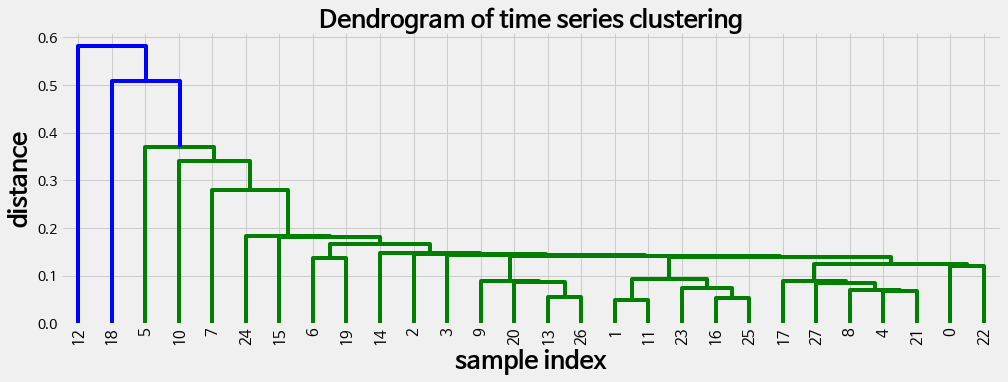

0 Cluster number 1 has 25 elements
1 Cluster number 2 has 1 elements
2 Cluster number 4 has 1 elements
3 Cluster number 3 has 1 elements


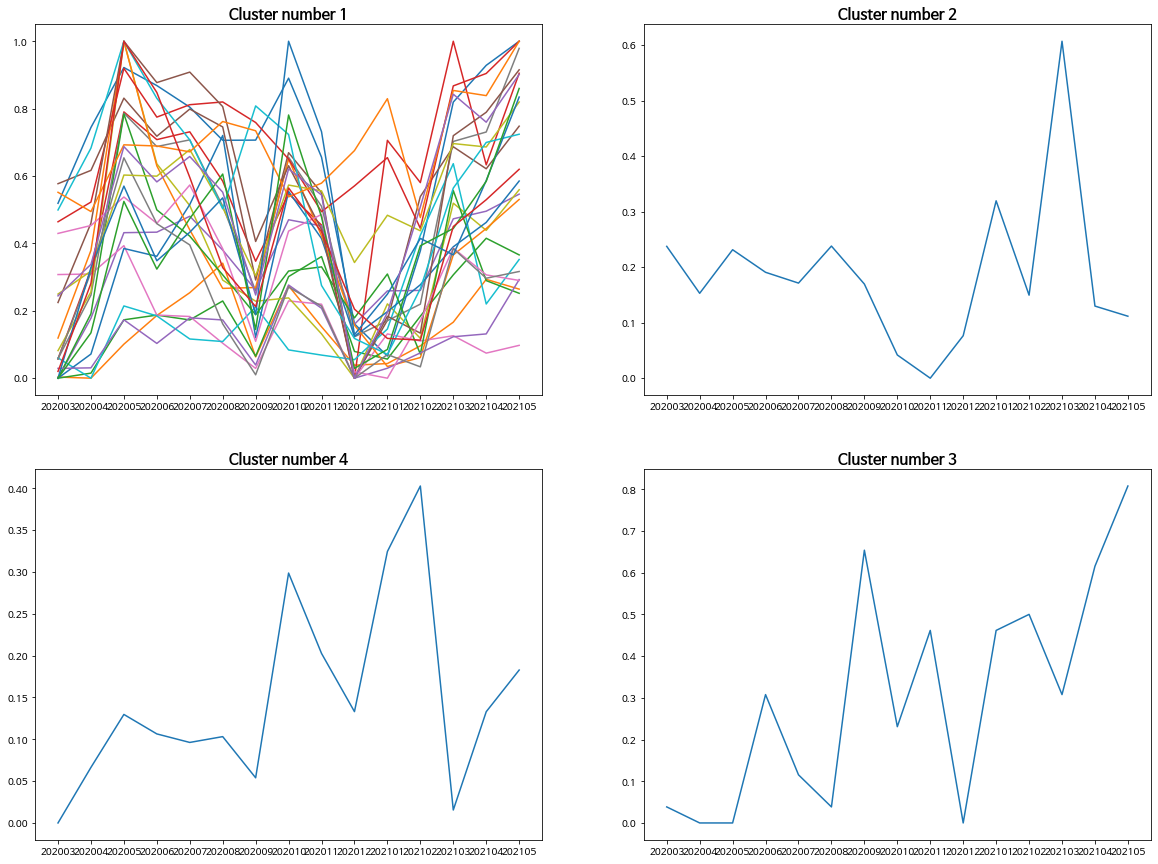

In [ ]:
#--- Here we use spearman correlation as distance metric
def myMetric(x, y):
    r = scipy.stats.pearsonr(x, y)[0]
    return 1 - r 

#--- run the clustering    
D = hac.linkage(timeSeries, method='single', metric=myMetric)
plot_dendogram(D)

#---- evaluate the dendogram
cut_off_level = 4   # level where to cut off the dendogram
plot_results(timeSeries, D, cut_off_level)
  

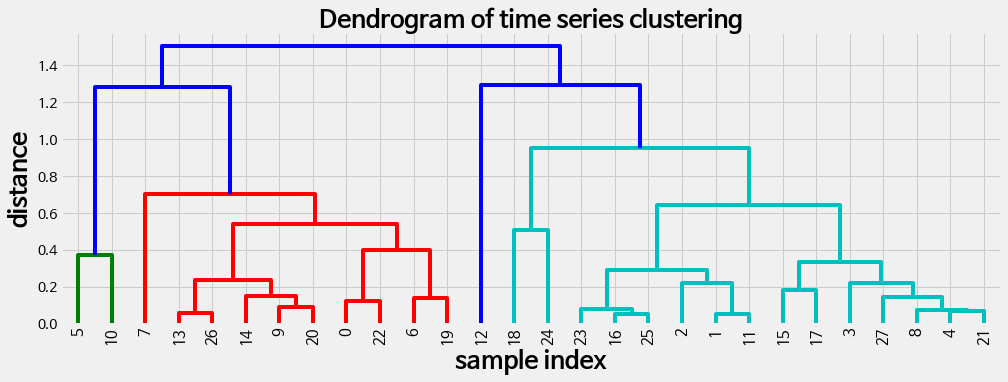

0 Cluster number 2 has 10 elements
1 Cluster number 3 has 15 elements
2 Cluster number 1 has 2 elements
3 Cluster number 4 has 1 elements


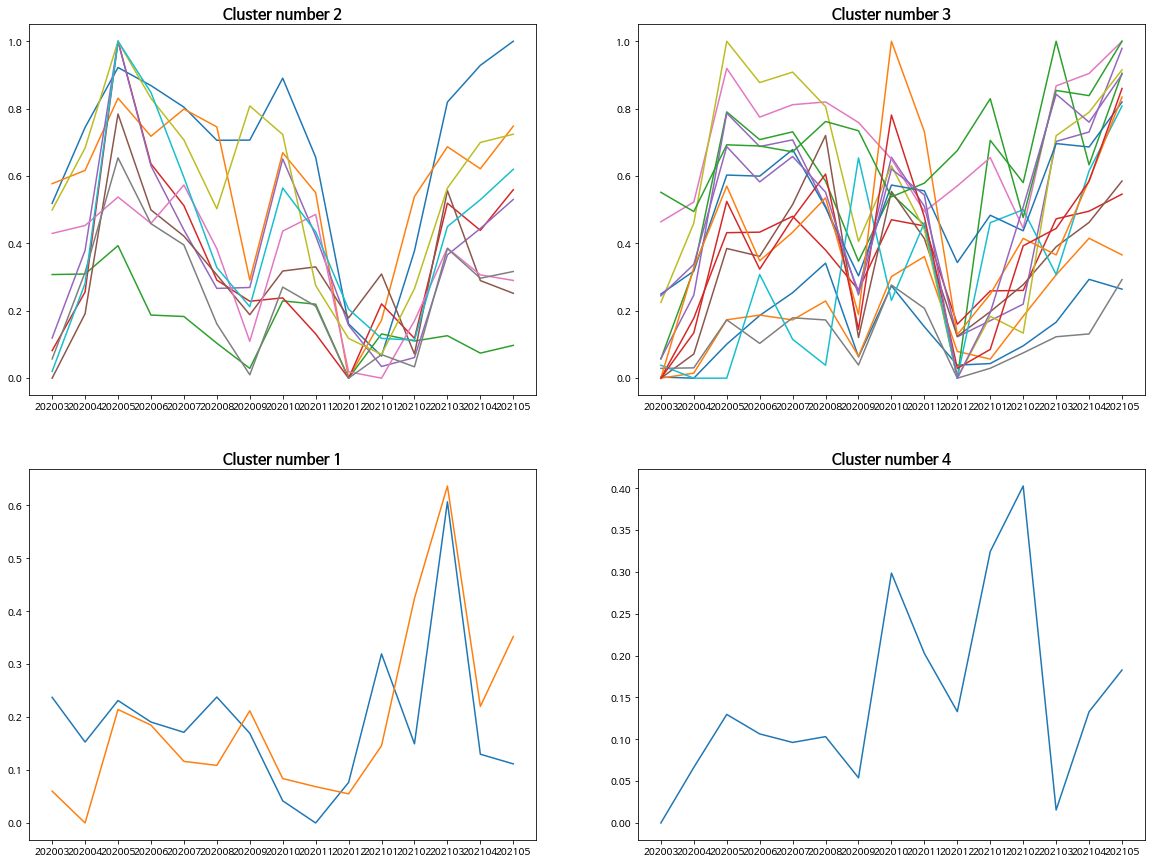

In [ ]:
#--- Here we use spearman correlation as distance metric
def myMetric(x, y):
    r = scipy.stats.pearsonr(x, y)[0]
    return 1 - r 

#--- run the clustering    
D = hac.linkage(timeSeries, method='complete', metric=myMetric)
plot_dendogram(D)

#---- evaluate the dendogram
cut_off_level = 4   # level where to cut off the dendogram
plot_results(timeSeries, D, cut_off_level)
  

In [ ]:
timeSeries.values

In [ ]:
import scipy.cluster.hierarchy as spc

In [ ]:
series_list = timeSeries.values

In [ ]:
series_list

In [ ]:
n_series

28

In [ ]:
len(series_list)

28

In [ ]:
series_list2[0]

0.0

In [ ]:
series_list2 = []

In [ ]:
series_list2.append(pd.Series(series_list[1]))

In [ ]:
series_list2 = []
for i in range(0,len(series_list)):
  series_list2.append(pd.Series(series_list[i]))

In [ ]:
for i in range(len(series_list2)):
    length = len(series_list2[i])
    series_list2[i] = series_list2[i].values.reshape((length, 1))

In [ ]:
n_series = len(series_list2)
distance_matrix = np.zeros(shape=(n_series, n_series))

# Build distance matrix
for i in range(n_series):
    for j in range(n_series):
        x = series_list2[i]
        y = series_list2[j]
        if i != j:
            dist = dtw_distance(x, y)
            distance_matrix[i, j] = dist

In [ ]:
distance_matrix

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:360: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='complete', metric='euclidean')


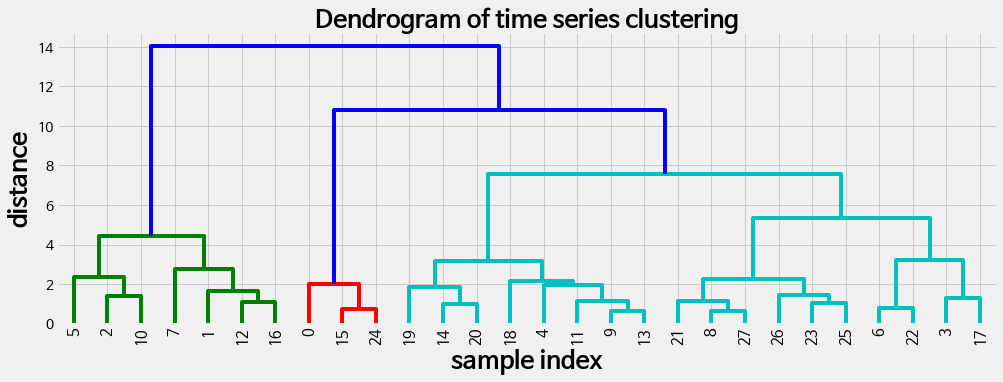

0 Cluster number 2 has 3 elements
1 Cluster number 1 has 7 elements
2 Cluster number 5 has 4 elements
3 Cluster number 3 has 8 elements
4 Cluster number 4 has 6 elements


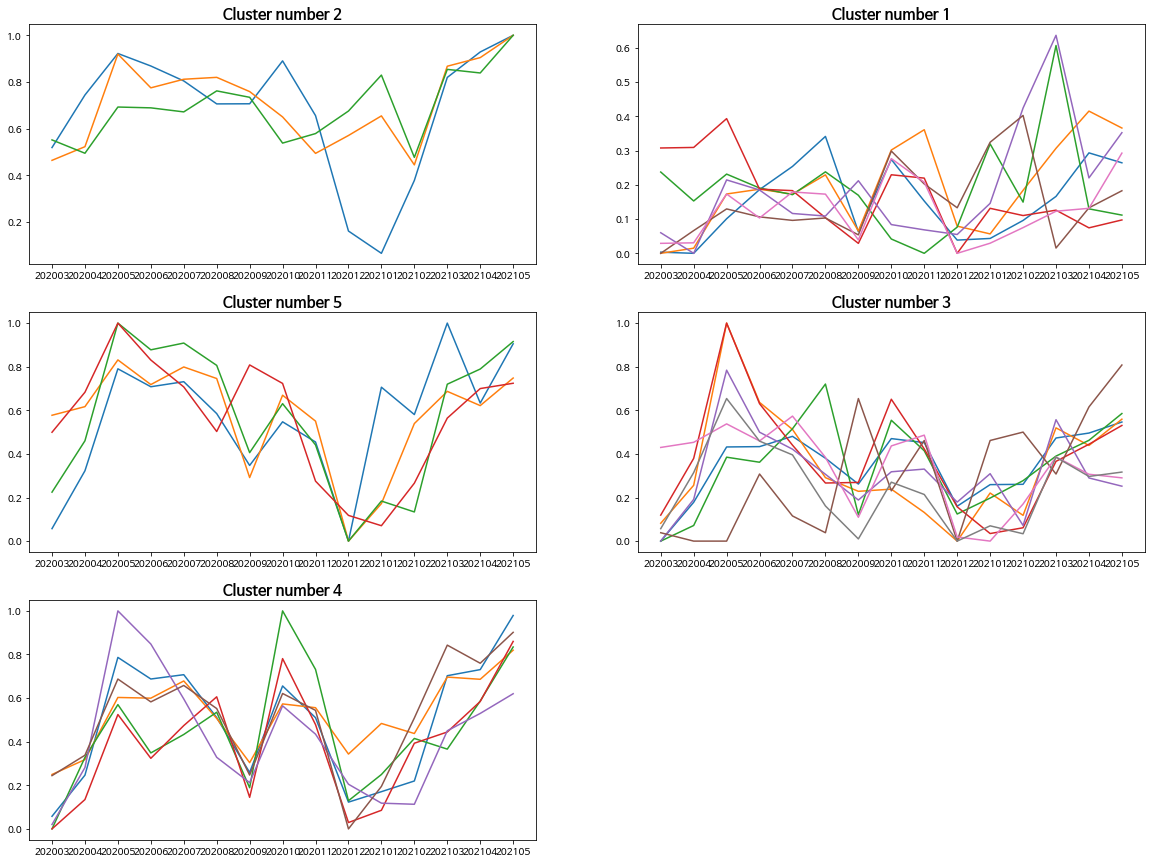

In [ ]:
Z = spc.complete(distance_matrix)
plot_dendogram(Z)

#---- evaluate the dendogram
cut_off_level = 5   # level where to cut off the dendogram
plot_results(timeSeries, Z, cut_off_level)

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:278: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='single', metric='euclidean')


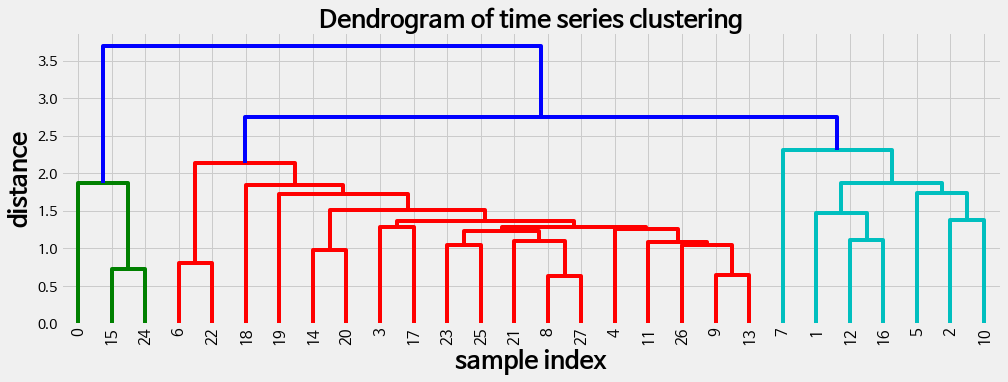

0 Cluster number 1 has 3 elements
1 Cluster number 3 has 7 elements
2 Cluster number 2 has 18 elements


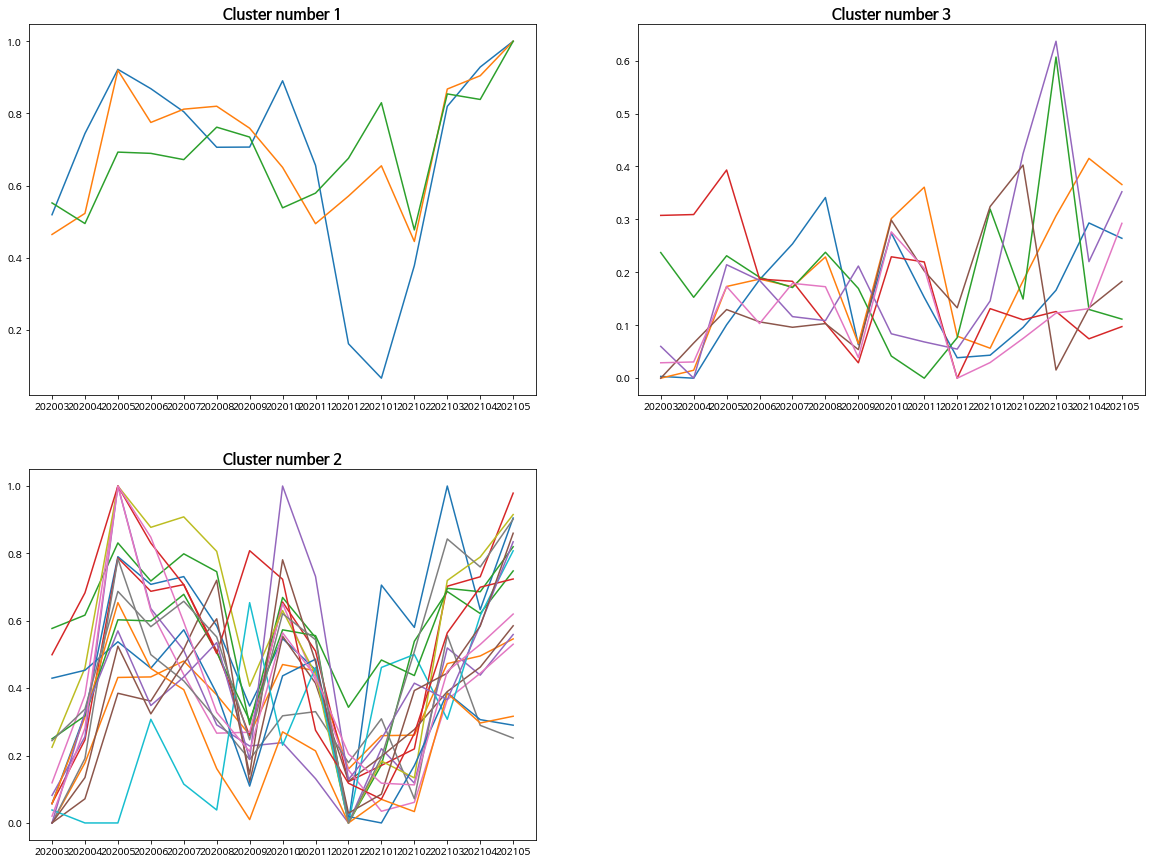

In [ ]:
Z = spc.single(distance_matrix)
plot_dendogram(Z)

#---- evaluate the dendogram
cut_off_level = 3  # level where to cut off the dendogram
plot_results(timeSeries, Z, cut_off_level)

/usr/local/lib/python3.7/dist-packages/scipy/cluster/hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


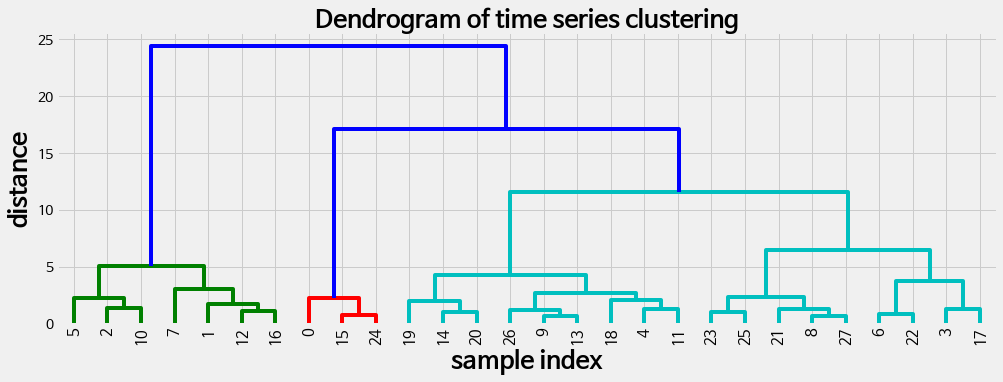

0 Cluster number 2 has 3 elements
1 Cluster number 1 has 7 elements
2 Cluster number 4 has 9 elements
3 Cluster number 3 has 9 elements


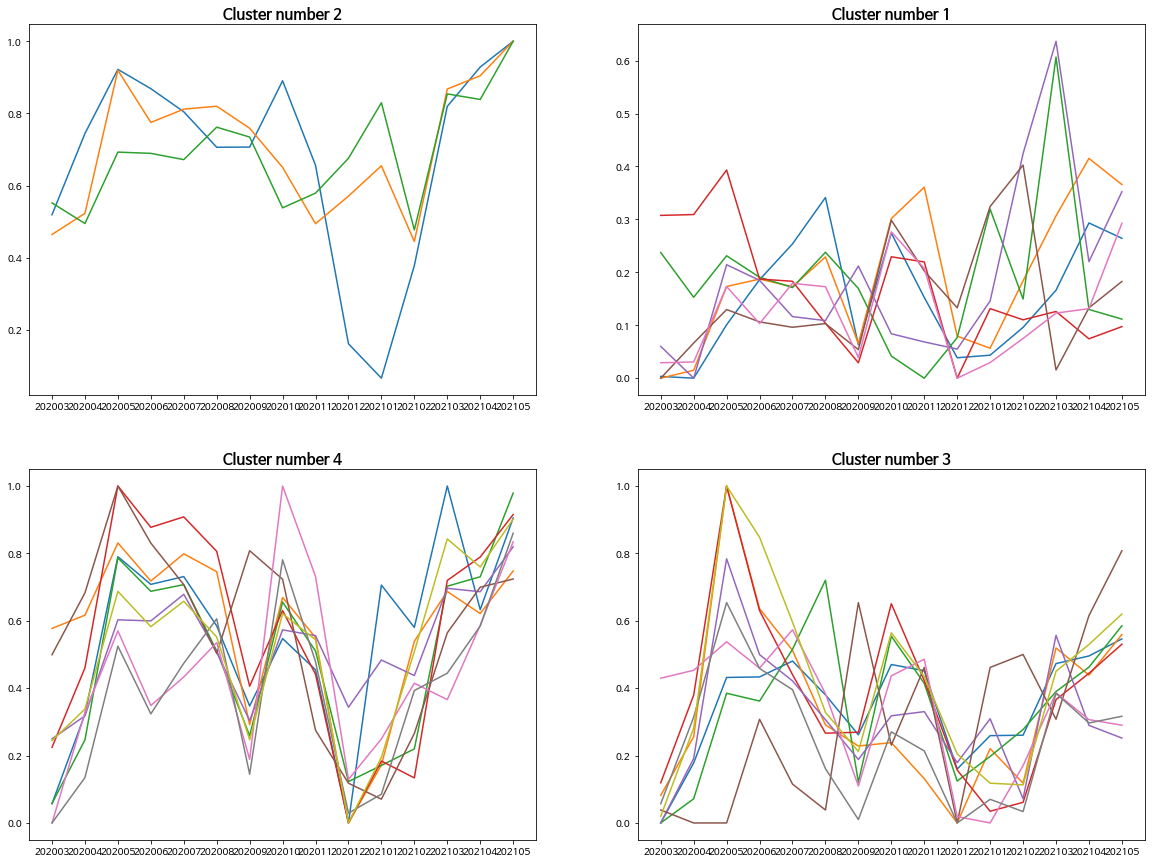

In [ ]:
Z = spc.ward(distance_matrix)
plot_dendogram(Z)

#---- evaluate the dendogram
cut_off_level = 4  # level where to cut off the dendogram
plot_results(timeSeries, Z, cut_off_level)

In [ ]:
cluster_labels = fcluster(linkage_matrix, 600, criterion='distance')

In [ ]:
spc.distance.pdist(timeSeries.values,'correlation')

In [ ]:
corr= older_ym2_sc.pivot_table(index='ta_ym',
                        columns='gb2', 
                        values='usec_sc').corr()

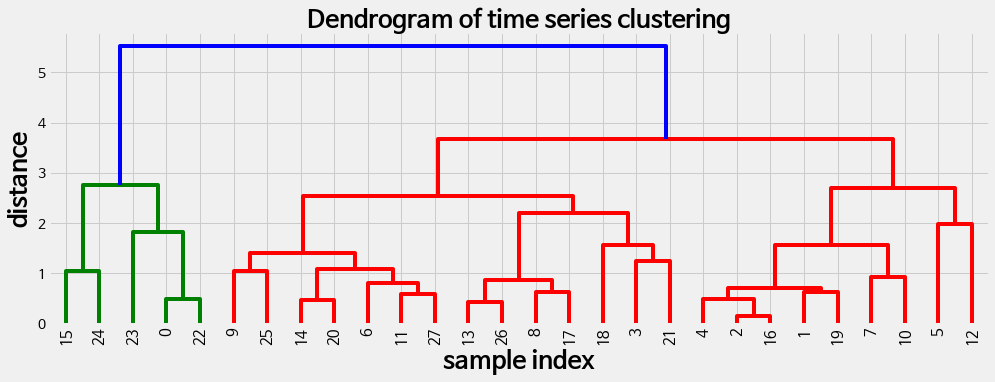

0 Cluster number 1 has 5 elements
1 Cluster number 3 has 9 elements
2 Cluster number 2 has 14 elements


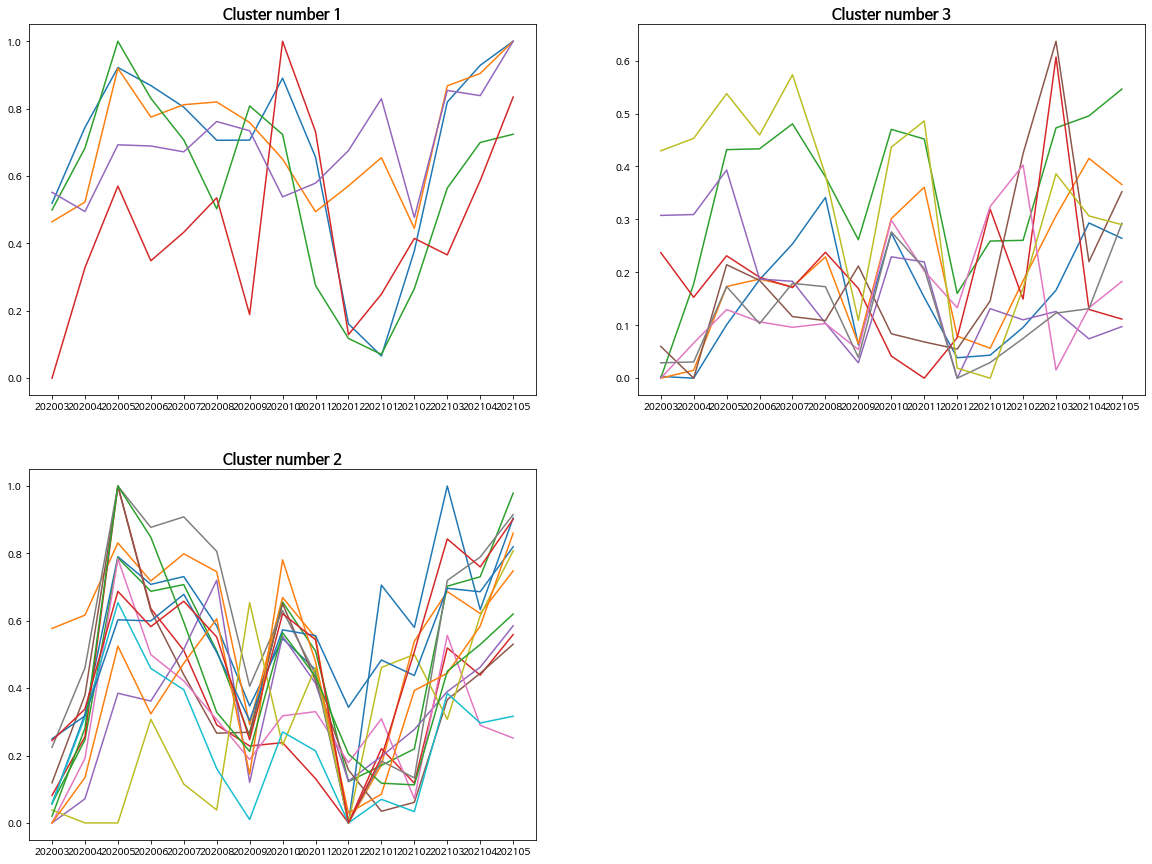

In [ ]:
pdist = spc.distance.pdist(corr)
Z = spc.linkage(pdist, method='complete')
plot_dendogram(Z)
cut_off_level = 3  # level where to cut off the dendogram
plot_results(timeSeries, Z, cut_off_level)

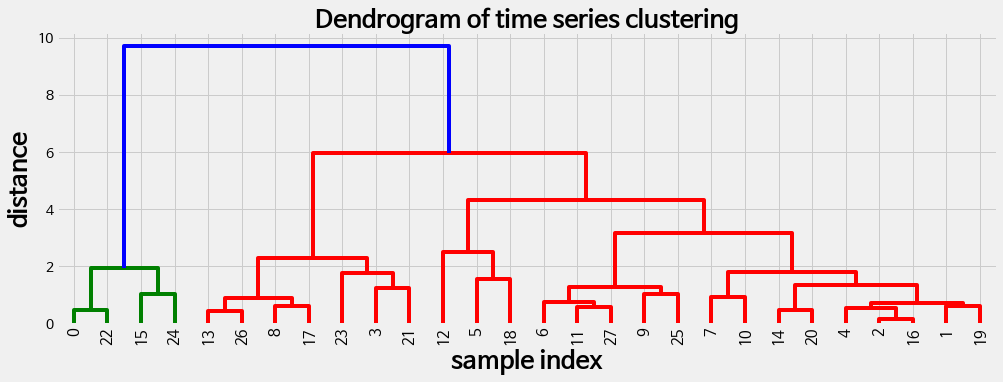

0 Cluster number 1 has 4 elements
1 Cluster number 5 has 9 elements
2 Cluster number 2 has 7 elements
3 Cluster number 3 has 3 elements
4 Cluster number 4 has 5 elements


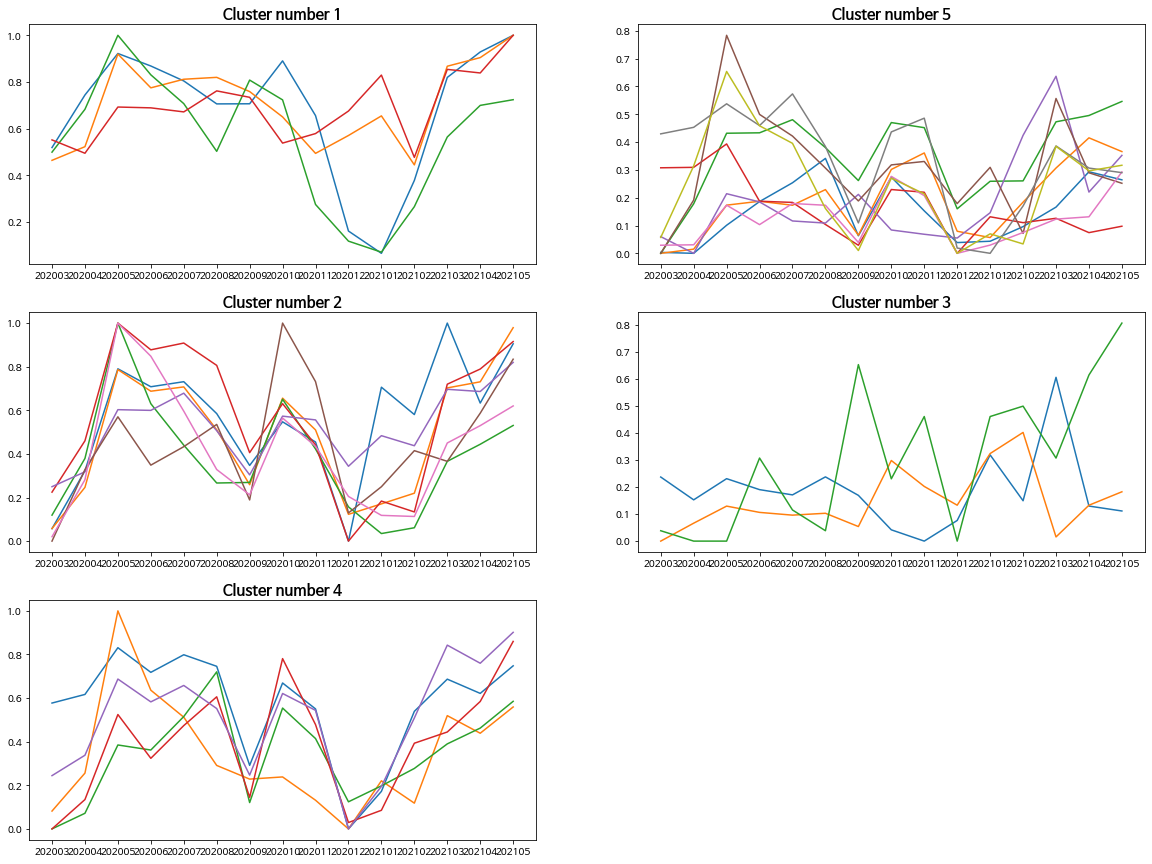

In [ ]:
pdist = spc.distance.pdist(corr)
Z = spc.linkage(pdist, method='ward')
plot_dendogram(Z)
cut_off_level = 5  # level where to cut off the dendogram
plot_results(timeSeries, Z, cut_off_level)

In [ ]:
X.shape

(50, 32, 1)

In [ ]:
>>> km_dba = tslearn.clustering.TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
...                           max_iter_barycenter=5,
...                           random_state=0).fit()


In [ ]:
numpy.random.seed(0)
X = random_walks(n_ts=20, sz=16, d=1)
labels = numpy.random.randint(2, size=20)
tslearn.clustering.silhouette_score(X, labels, metric="dtw")  # doctest: +ELLIPSIS

0.13383800961858022

In [ ]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data)

In [ ]:
import tslearn.clustering

In [ ]:
>>> from tslearn.generators import random_walks
>>> X = random_walks(n_ts=50, sz=32, d=1)
>>> km = tslearn.clustering.TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=5,
...                       random_state=0).fit(X)
>>> km.labels_

array([0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 2, 0])

In [ ]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
print(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]
X_train.shape

[[[ 0.70157]
  [ 0.68037]
  [ 0.65098]
  ...
  [ 0.5812 ]
  [ 0.58992]
  [ 0.59864]]

 [[ 0.78282]
  [ 0.72935]
  [ 0.70724]
  ...
  [ 0.70112]
  [ 0.71937]
  [ 0.78496]]

 [[-1.4516 ]
  [-1.4782 ]
  [-1.4972 ]
  ...
  [ 0.73234]
  [ 0.66991]
  [ 0.70815]]

 ...

 [[-2.034  ]
  [-2.0233 ]
  [-1.9996 ]
  ...
  [ 0.57997]
  [ 0.56166]
  [ 0.5931 ]]

 [[ 0.65689]
  [ 0.69002]
  [ 0.7148 ]
  ...
  [ 0.77849]
  [ 0.71703]
  [ 0.69609]]

 [[ 0.58344]
  [ 0.62756]
  [ 0.60859]
  ...
  [ 0.58718]
  [ 0.5948 ]
  [ 0.59791]]]


(50, 40, 1)

In [ ]:
len(timeSeries)

28

In [ ]:
timeSeries

ta_ym,202003,202004,202005,202006,202007,202008,202009,202010,202011,202012,202101,202102,202103,202104,202105
gb2,,,,,,,,,,,,,,,
골프,0.518969,0.744217,0.922050,0.868477,0.804457,0.706058,0.706563,0.890387,0.655867,0.161189,0.065732,0.377982,0.819475,0.928513,1.000000
공연관람,0.003345,0.000000,0.100937,0.186104,0.253717,0.341380,0.063146,0.274131,0.152640,0.038636,0.043435,0.096005,0.166204,0.293327,0.264320
관광쇼핑,0.000000,0.015005,0.173280,0.187257,0.172856,0.229131,0.065204,0.301564,0.360921,0.079372,0.056656,0.183955,0.306673,0.415282,0.365862
교육훈련,0.057166,0.322614,0.790303,0.708046,0.731175,0.584839,0.347114,0.547187,0.454536,0.000000,0.705947,0.580452,1.000000,0.633203,0.904977
교통,0.000000,0.178079,0.431843,0.433382,0.480580,0.380257,0.261617,0.470190,0.451882,0.160084,0.259097,0.260499,0.472949,0.495609,0.546224
독서,0.237402,0.152883,0.231332,0.190697,0.171262,0.237926,0.169525,0.041816,0.000000,0.076498,0.319437,0.149522,0.606788,0.129861,0.111616
레저스포츠,0.577235,0.616741,0.831139,0.718044,0.798772,0.745728,0.291455,0.669209,0.550379,0.000000,0.172144,0.539189,0.686836,0.621517,0.747974
목욕,0.307590,0.309202,0.393339,0.187363,0.183089,0.103774,0.029079,0.229383,0.219614,0.000000,0.131400,0.110312,0.126039,0.074413,0.097445
미술공예참여,0.057786,0.246471,0.786612,0.687500,0.707322,0.510614,0.258740,0.655685,0.510008,0.122794,0.170738,0.219756,0.702636,0.730646,0.978909


In [ ]:
series_list.reshape(28,15,1)

array([[[0.51896909],
        [0.74421705],
        [0.92205002],
        [0.8684766 ],
        [0.80445742],
        [0.70605765],
        [0.70656331],
        [0.89038664],
        [0.65586728],
        [0.16118928],
        [0.06573153],
        [0.3779818 ],
        [0.81947496],
        [0.92851299],
        [1.        ]],

       [[0.00334487],
        [0.        ],
        [0.10093661],
        [0.18610423],
        [0.2537171 ],
        [0.34137988],
        [0.0631461 ],
        [0.27413096],
        [0.15264015],
        [0.03863636],
        [0.04343468],
        [0.0960049 ],
        [0.1662039 ],
        [0.29332654],
        [0.26431997]],

       [[0.        ],
        [0.01500513],
        [0.17328023],
        [0.18725738],
        [0.1728561 ],
        [0.22913132],
        [0.06520353],
        [0.30156425],
        [0.36092101],
        [0.07937238],
        [0.05665622],
        [0.18395539],
        [0.30667299],
        [0.41528165],
        [0.36586202]],

    